# Multigroup aspatial indexes of segregation

This is an example notebook of functionalities for multigroup aspatial indexes of the *segregation* module. Firstly, we need to import the packages we need:

In [1]:
%%capture

import libpysal
import segregation
import geopandas as gpd

Then it's time to load some data to estimate segregation. We use the data of 2000 Census Tract Data for the metropolitan area of Sacramento, CA, USA. 

We use a geopandas dataframe available in PySAL examples repository.

For more information about the data: https://github.com/pysal/libpysal/tree/master/libpysal/examples/sacramento2

In [2]:
input_df = gpd.read_file(libpysal.examples.get_path("sacramentot2.shp"))
input_df.columns

Index(['FIPS', 'MSA', 'TOT_POP', 'POP_16', 'POP_65', 'WHITE_', 'BLACK_',
       'ASIAN_', 'HISP_', 'MULTI_RA', 'MALES', 'FEMALES', 'MALE1664',
       'FEM1664', 'EMPL16', 'EMP_AWAY', 'EMP_HOME', 'EMP_29', 'EMP_30',
       'EMP16_2', 'EMP_MALE', 'EMP_FEM', 'OCC_MAN', 'OCC_OFF1', 'OCC_INFO',
       'HH_INC', 'POV_POP', 'POV_TOT', 'HSG_VAL', 'FIPSNO', 'POLYID',
       'geometry'],
      dtype='object')

The groups of interest are White, Black, Asian and Hispanic population. Therefore, we create an auxiliary list with only the necessary columns for fitting the index.

In [3]:
groups_list = ['WHITE_', 'BLACK_', 'ASIAN_','HISP_']

We also can plot the spatial distribution of the composition of each of these groups over the tracts of Sacramento:

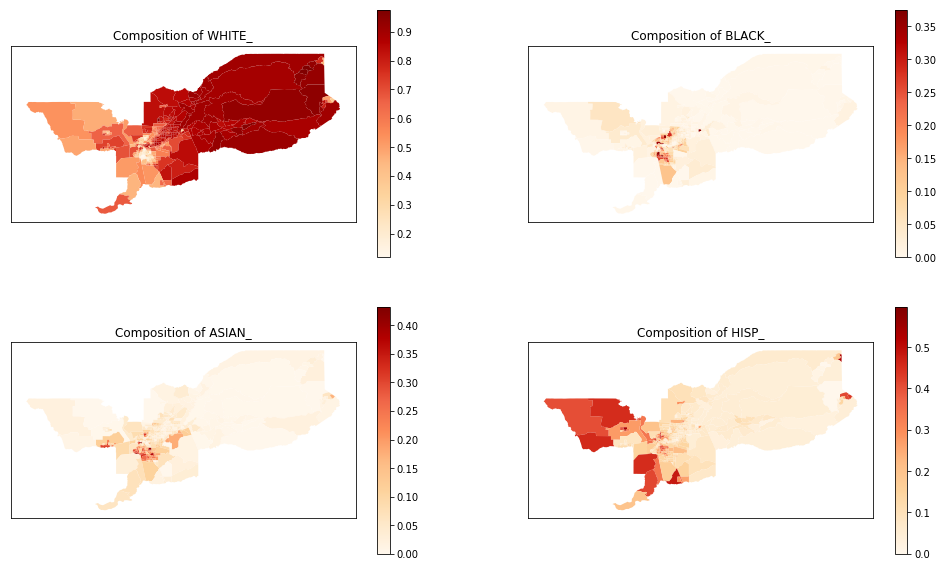

In [4]:
import matplotlib.pyplot as plt

for i in range(len(groups_list)):
    input_df['comp_' + groups_list[i]] = input_df[groups_list[i]] / input_df['TOT_POP']

fig, axes = plt.subplots(ncols = 2, nrows = 2, figsize = (17, 10))


input_df.plot(column = 'comp_' + groups_list[0],
              cmap = 'OrRd',
              legend = True, ax = axes[0,0])
axes[0,0].set_title('Composition of ' + groups_list[0])
axes[0,0].set_xticks([])
axes[0,0].set_yticks([])
axes[0,0].set_facecolor('white')


input_df.plot(column = 'comp_' + groups_list[1],
              cmap = 'OrRd',
              legend = True, ax = axes[0,1])
axes[0,1].set_title('Composition of ' + groups_list[1])
axes[0,1].set_xticks([])
axes[0,1].set_yticks([])
axes[0,1].set_facecolor('white')


input_df.plot(column = 'comp_' + groups_list[2],
              cmap = 'OrRd',
              legend = True, ax = axes[1,0])
axes[1,0].set_title('Composition of ' + groups_list[2])
axes[1,0].set_xticks([])
axes[1,0].set_yticks([])
axes[1,0].set_facecolor('white')

input_df.plot(column = 'comp_' + groups_list[3],
              cmap = 'OrRd',
              legend = True, ax = axes[1,1])
axes[1,1].set_title('Composition of ' + groups_list[3])
axes[1,1].set_xticks([])
axes[1,1].set_yticks([])
axes[1,1].set_facecolor('white')

# Multigroup Dissimilarity Index

In [5]:
%%capture
from segregation.aspatial import Multi_Dissim

In [6]:
index = Multi_Dissim(input_df, groups_list)
type(index)

segregation.aspatial.multigroup_aspatial_indexes.Multi_Dissim

In [7]:
index.statistic

0.41340872573177806

# Multigroup Gini Index

In [8]:
%%capture
from segregation.aspatial import Multi_Gini_Seg

In [9]:
index = Multi_Gini_Seg(input_df, groups_list)
type(index)

segregation.aspatial.multigroup_aspatial_indexes.Multi_Gini_Seg

In [10]:
index.statistic

0.5456349992598081

# Multigroup Normalized Exposure Index

In [11]:
%%capture
from segregation.aspatial import Multi_Normalized_Exposure

In [12]:
index = Multi_Normalized_Exposure(input_df, groups_list)
type(index)

segregation.aspatial.multigroup_aspatial_indexes.Multi_Normalized_Exposure

In [13]:
index.statistic

0.18821879029994157

# Multigroup Information Theory Index

In [14]:
%%capture
from segregation.aspatial import Multi_Information_Theory

In [15]:
index = Multi_Information_Theory(input_df, groups_list)
type(index)

c:\users\renan\desktop\segregation\segregation\aspatial\multigroup_aspatial_indexes.py:343: RuntimeWarning: divide by zero encountered in log
  MIT = np.nansum(ti[:,None] * pik * np.log(pik / Pk)) / (T*E)
c:\users\renan\desktop\segregation\segregation\aspatial\multigroup_aspatial_indexes.py:343: RuntimeWarning: invalid value encountered in multiply
  MIT = np.nansum(ti[:,None] * pik * np.log(pik / Pk)) / (T*E)


segregation.aspatial.multigroup_aspatial_indexes.Multi_Information_Theory

In [16]:
index.statistic

0.1710160297858887

# Multigroup Relative Diversity Index

In [17]:
%%capture
from segregation.aspatial import Multi_Relative_Diversity

In [18]:
index = Multi_Relative_Diversity(input_df, groups_list)
type(index)

segregation.aspatial.multigroup_aspatial_indexes.Multi_Relative_Diversity

In [19]:
index.statistic

0.15820019878220337

# Multigroup Squared Coefficient of Variation Index

In [20]:
%%capture
from segregation.aspatial import Multi_Squared_Coefficient_of_Variation

In [21]:
index = Multi_Squared_Coefficient_of_Variation(input_df, groups_list)
type(index)

segregation.aspatial.multigroup_aspatial_indexes.Multi_Squared_Coefficient_of_Variation

In [22]:
index.statistic

0.11875484641127525

# Multigroup Diversity Index

In [23]:
%%capture
from segregation.aspatial import Multi_Diversity

In [24]:
index = Multi_Diversity(input_df, groups_list)
type(index)

segregation.aspatial.multigroup_aspatial_indexes.Multi_Diversity

In [25]:
index.statistic

0.9733112243997906

In [26]:
# Normalized version of the multigroup diversity index
normalized_index = Multi_Diversity(input_df, groups_list, normalized = True)
normalized_index.statistic

0.7020956383415715

# Simpson's Concentration Index (lambda)

In [27]:
%%capture
from segregation.aspatial import Simpsons_Concentration

In [28]:
index = Simpsons_Concentration(input_df, groups_list)
type(index)

segregation.aspatial.multigroup_aspatial_indexes.Simpsons_Concentration

In [29]:
index.statistic

0.49182413151957904

# Simpson's Interaction Index (I)

In [30]:
%%capture
from segregation.aspatial import Simpsons_Interaction

In [31]:
index = Simpsons_Interaction(input_df, groups_list)
type(index)

segregation.aspatial.multigroup_aspatial_indexes.Simpsons_Interaction

In [32]:
index.statistic

0.508175868480421